<a href="https://colab.research.google.com/github/Helm110/ASTRON-1221/blob/main/GravitationalWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installs required code
! pip install gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99223 sha256=e5389977e188de6c5a750a4826af3c03db84b26fa783d3a6a19be0eefa868aa1
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [19]:
# # -- Set a GPS time:
#Example Event
t0 = 1126259462.4    # -- GW150914
#Chosen Event
t1 = 1242459857.5 # -- GW190521_074359

#Imports the time series library as 'TimeSeries'
from gwpy.timeseries import TimeSeries

# Fetch data from LIGO using the GPS time
hdata = TimeSeries.fetch_open_data('H1', 1242459850, 1242459865) #Changed from example

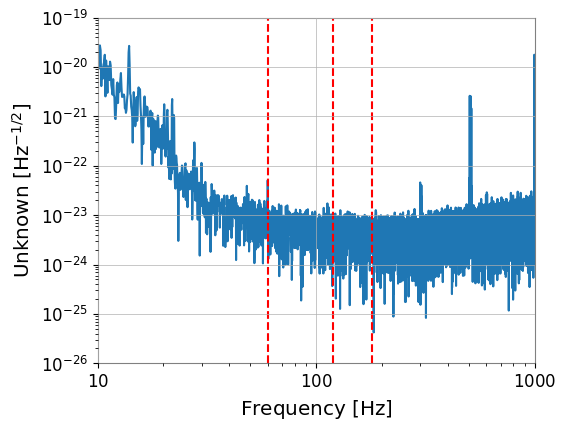

In [40]:
#Import the ploting library to create visual plots
import matplotlib.pyplot as plt

# -- Plot ASD
fig2 = hdata.asd().plot()
#Define and plot the x-axis limits
plt.xlim(10,1000)
#Define the y-axis limits
ymin = 1e-26
ymax = 1e-19
#Plot y-axis limits
plt.ylim(ymin, ymax)
#plot a dotted line representing faulty data points
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")

In [21]:
#Imports library to filter data
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

#Defines 'notches' of data to remove
notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 120, 180)]

#Stores the combination of filters used
zpk = filter_design.concatenate_zpks(bp, *notches)

#Filters out data
hfilt = hdata.filter(zpk, filtfilt=True)


In [22]:
#Runs data through defined filters from above
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

In [23]:
#When in doubt print it out
print(*hdata.span.contract(1))

1242459852.0 1242459863.0


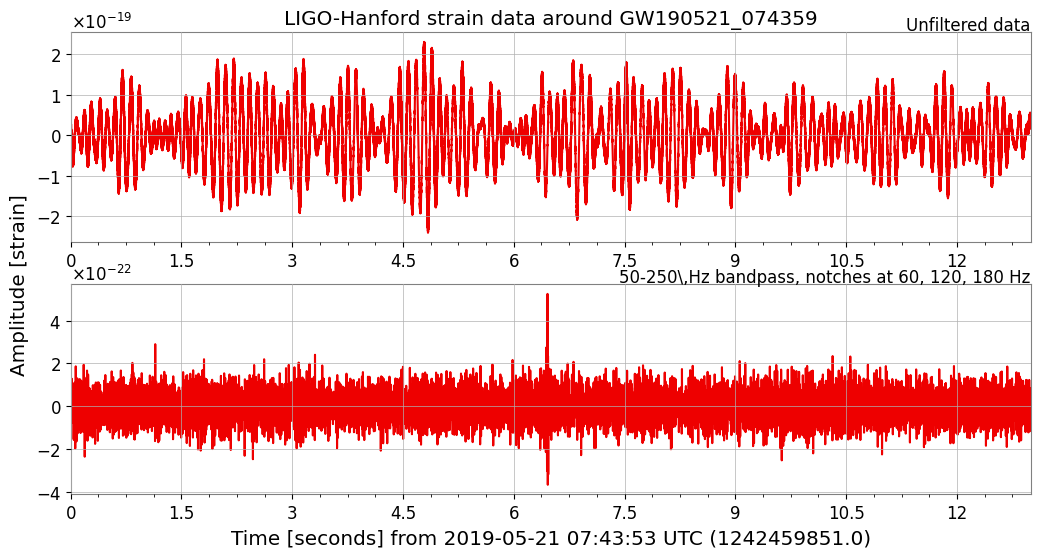

In [41]:
#Importing plot from gwpy and saving it as 'Plot'
from gwpy.plot import Plot
#Creating a figure with both graphs (unfiltered and filtered data)
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
#Ploting the scaling on the axis
ax1, ax2 = plot.axes
#Adding a title and graph descriptors
ax1.set_title('LIGO-Hanford strain data around GW190521_074359')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
#Adding Graph Labels to read easier
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
#Noting the removal of 60, 120, & 180 Hz from the data
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
#Displaying the plot
plot.show()

Now using functions in matlibplot to plot without using gwpy

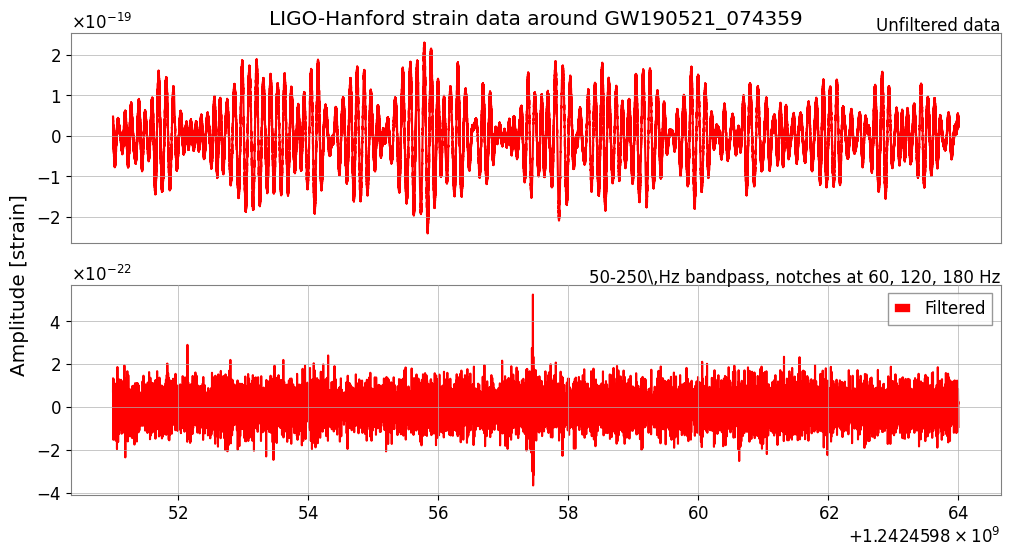

In [47]:
plt.figure(figsize=[12, 6])
#Plot first graph
ax1 = plt.subplot(2, 1, 1)
ax1.plot(hdata.times.value, hdata.value, color="red", label="Unfiltered")
ax1.set_title('LIGO-Hanford strain data around GW190521_074359')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
#Hide the x-axis for plo t1
ax1.xaxis.set_visible(False)
#Plot second graph
ax2 = plt.subplot(2, 1, 2)
ax2.plot(hfilt.times.value, hfilt.value, color="red", label="Filtered")
#Defines the plot y-axis label for both plots
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
#Selectivley ploting the values we want
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
#Create a legend for figure
plt.legend()


In [26]:
#Quick print check to make sure it is correct
hdata.value

array([4.72355186e-20, 3.65910113e-20, 3.11362409e-20, ...,
       2.56169380e-20, 2.24107612e-20, 4.27466450e-20])

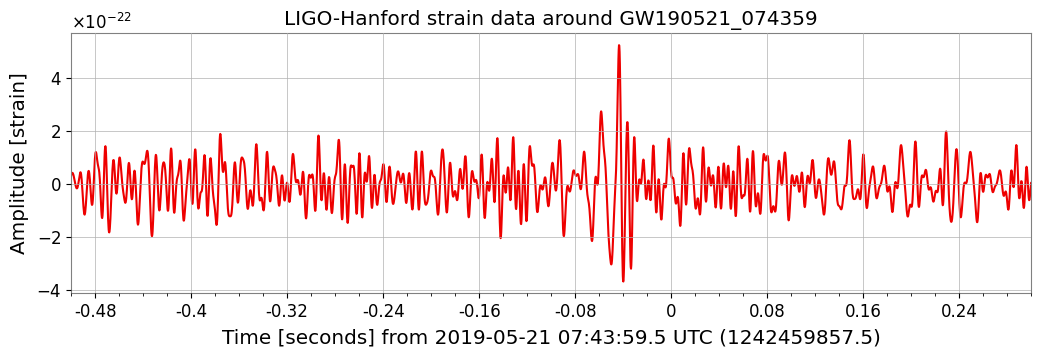

In [43]:
#Not needed
#import matplotlib.pyplot as plt

#Creating a plot of Strain data
plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
#Creating Titles and axis labels
ax.set_title('LIGO-Hanford strain data around GW190521_074359')
ax.set_ylabel('Amplitude [strain]')
#Seting the timescale to a more ideal length
ax.set_xlim(1242459857, 1242459857.8)
ax.set_xscale('seconds', epoch=1242459857.5)
#Display Plot
plot.show()

#Using data to create lines
x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [30]:
#Defining Livingston data to compare the two labs
ldata = TimeSeries.fetch_open_data('L1', 1242459835, 1242459870)
lfilt = ldata.filter(zpk, filtfilt=True)

In [31]:
#Accounting for the distance/ delay in travel time
lfilt.shift('6.9ms')
lfilt *= -1

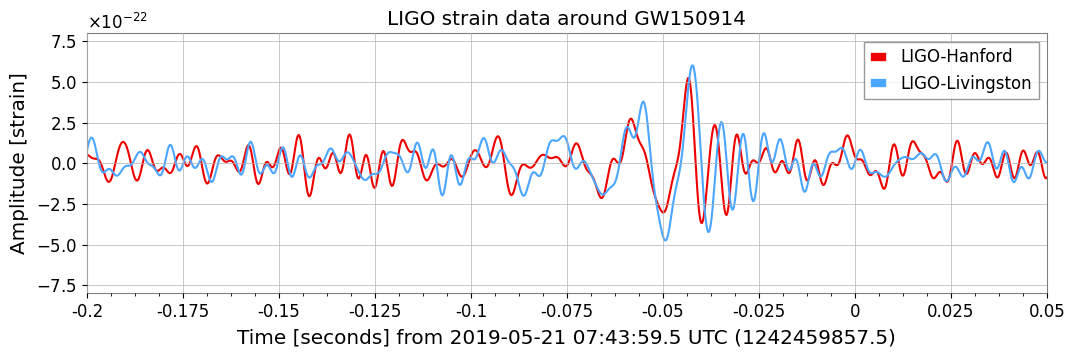

In [46]:
#Creates a aspect ratio for diagram
plot = Plot(figsize=[12, 4])
#Creating the graph comparing the two labs data
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
#Labeling the title
ax.set_title('LIGO strain data around GW150914') #Change
#Create the axis limits
ax.set_xlim(1242459857.3, 1242459857.55)
ax.set_ylim(-.8e-21, .8e-21)
ax.set_xscale('seconds', epoch=1242459857.5)
#Label the y-axis
ax.set_ylabel('Amplitude [strain]')
#Create Legend
ax.legend()
#Display Plot
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

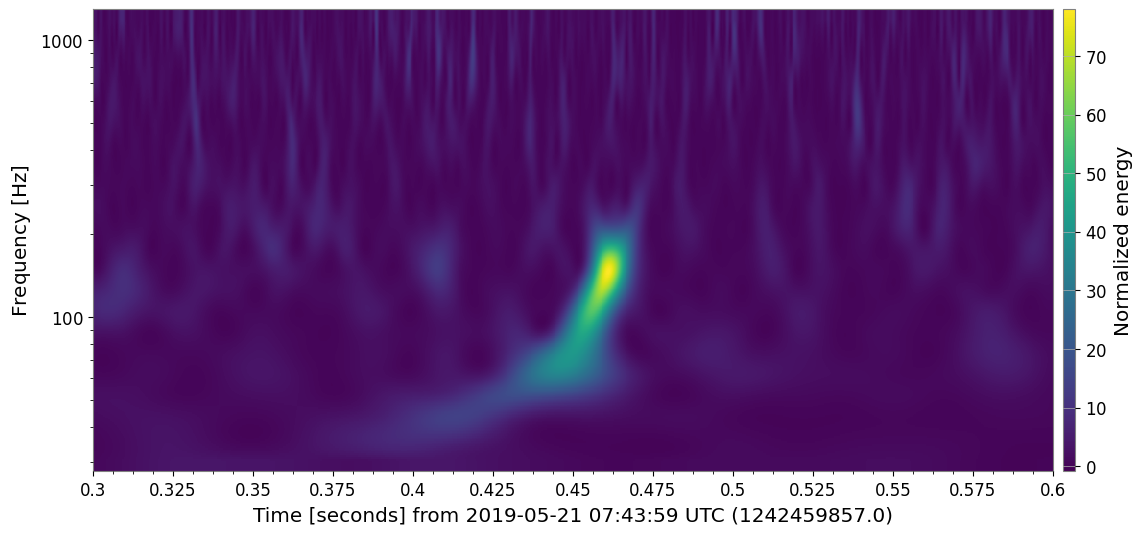

In [34]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t1-dt, t1+0.1))
fig4 = hq.plot()
ax = fig4.gca()
#Provides the color reference bar for Normalized Energy
fig4.colorbar(label="Normalized energy")
#Hides the grid
ax.grid(False)
#Creates the y scale to be log
ax.set_yscale('log')

In [15]:
#Imports libraries to create a sound file
from scipy.io.wavfile import write
import numpy as np

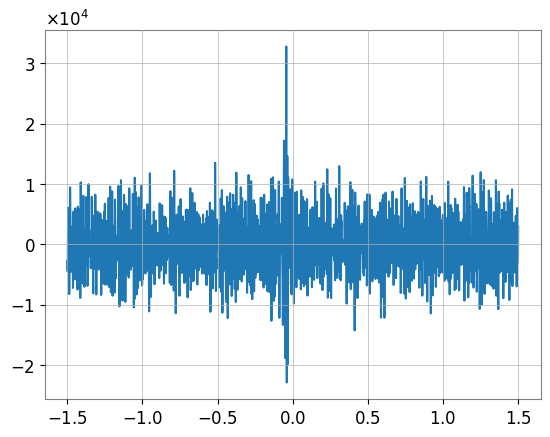

In [35]:
#Loading the data into 'amplitude'
amplitude = np.iinfo(np.int16).max
#Establishes a range of values to use
ind = np.where((x_val < (t1+1.5)) & (x_val > (t1-1.5)))
#Uses the values from above
y = y_val[ind]
# y = y**3
y = y / np.max(y)
#Create the plot
plt.plot(x_val[ind] - t1, (np.array(y) * amplitude).astype(np.int16))

In [36]:
#Creates the sound file ("whooOOp sound")
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t1))))
print("fs = ", fs)
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))

fs =  4096


In [37]:
#dowloads the sound file
from google.colab import files
files.download("example.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
#Rough Distance between labs
d = 3e8 * 6.9*10**-3
print(d)


2070000.0
